In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data_set/sentiment_analysis.csv")

In [3]:
data.value_counts()

id    label  tweet                                                                                                                              
7904  0      @KaylaHinks @SnapchatProbbz haha so true. Deleted bbm and itube. Most lost feeling ever lol.                                           1
7903  1      All I wanna do is put music from my iTunes on to my iPhone. Why does this have to be so fucking difficult? #apple                      1
7902  1      @brendan_brady1: The new apple advert can fuck off as can any apple related product.  true say!                                        1
7901  0      Why did my iPhone calendar link with my Facebook calendar? I don't even have Facebook installed on my phone. #apple #facebook          1
7900  0      Early Christmas present?! Sure, dont mind if i do! Thanks babe, for my Galaxy Tab 2! :) #samsung #galaxy #myfianceisbetterthanyours    1
                                                                                                         

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


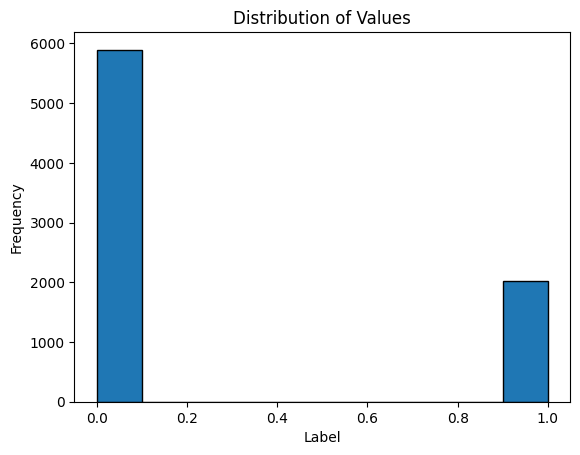

In [8]:
# Plotting the histogram
plt.hist(data['label'], edgecolor='black')

# Add title and labels
plt.title('Distribution of Values')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [71]:
# SO THIS IS A UNBALANCED DATA SET

## Data Preprocessing

In [13]:
# check is there any duplicate values
data.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [14]:
data.duplicated().sum() # take the sum of duplicated values

np.int64(0)

In [16]:
data.shape

(7920, 3)

In [17]:
# Check are there any null values included or not
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text preprocessing

In [18]:
# Convert upppercase to lowercase
# Remove links
# Remove punctuations
# Remove numbers
# Remove stopwords
# Stemming

In [19]:
import re # regular expressions
import string

In [20]:
# Convert uppercase to lowercase
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [21]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [24]:
# Remove links

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', "", x,flags=re.MULTILINE) for x in x.split()))

In [23]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [26]:
# Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")

    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [28]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [30]:
# Remove numbers
data["tweet"] = data["tweet"].str.replace("\\d+", "", regex=True)

In [31]:
data["tweet"].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove stopwords

In [32]:
!pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 640.0 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 435.7 kB/s eta 0:00:01
     ---------------------------- --------- 30.7/41.5 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 200.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 1.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 438.1 kB/s eta 0:00:04
   -- --------------------------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import nltk  # natural language toolkit

In [34]:
nltk.download('stopwords', download_dir="../static/model")

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
with open("../static/model/corpora/stopwords/english", "r") as file:
    stwords = file.read().splitlines()

stwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stwords))

In [40]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

STEMMING

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [43]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### Building Vocabulary

In [44]:
from collections import Counter
vocab = Counter()

In [45]:
# with counter methode we can see what are the words and their frequency in some list

In [46]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [47]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [48]:
len(vocab)

15949

### reduce number of features due to overfitting issues

In [49]:
tokens = [key for key in vocab if vocab[key] > 10]

In [51]:
len(tokens)

1145

In [52]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Devide DataSet

In [53]:
x = data["tweet"]
y = data["label"]

In [56]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata (12 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 249.0 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-win_amd64.whl (10.9 MB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB 991.0 kB/s eta 0:00:45
   ---------------------------------------- 0.1/44.5 MB 975.2 kB/s eta 0:00:46
   ---------------------------------------- 0.1/44.5 MB 975.2 kB/s eta 0:00:46
   -----------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------------------------- -------------- 28.1/44.5 MB 111.0 kB/s eta 0:02:28
   ------------------------- -------------- 28.1/44.5 MB 111.0 kB/s eta 0:02:28
   ------------------------- -------------- 28.1/44.5 MB 111.1 kB/s eta 0:02:28
   ------------------------- -------------- 28.1/44.5 MB 111.1 kB/s eta 0:02:28
   ------------------------- -------------- 28.1/44.5 MB 111.1 kB/s eta 0:02:28
   ------------------------- -------------- 28.2/44.5 MB 111.2 kB/s eta 0:02:28
   ------------------------- -------------- 28.2/44.5 MB 111.2 kB/s eta 0:02:28
   ------------------------- -------------- 28.2/44.5 MB 111.2 kB/s eta 0:02:28
   ------------------------- -------------- 28.2/44.5 MB 111.3 kB/s eta 0:02:27
   ------------------------- -------------- 28.2/44.5 MB 111.3 kB/s eta 0:02:27
   ------------------------- -------------- 28.2/44.5 MB 111.3 kB/s eta 0:02:27
   ------------------------- -------------- 28.2/44.5 MB 111.3 kB/s eta 0:02:27
   ------------------------- -----------

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [61]:
x_train.shape

(6336,)

In [62]:
x_test.shape

(1584,)

### Vectorization

In [65]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [67]:
vectorized_x_train = vectorizer(x_train, tokens)

In [68]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
vectorized_x_test = vectorizer(x_test, tokens)

In [70]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [72]:
y_train.value_counts()

label
0    4696
1    1640
Name: count, dtype: int64

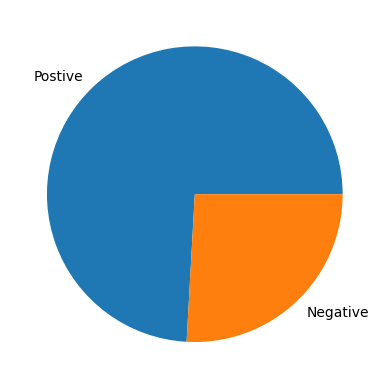

In [74]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=["Postive", "Negative"])
plt.show()

## Handle imbalance data set

In [75]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.3 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 435.7 kB/s eta 0:00:01
   ---- ---------------------------------- 30.7/258.3 kB 435.7 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 163.4 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.3 kB 217.9 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.3 kB 290.5 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 327.2 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 327.2 kB/s eta 0:00:01
   ---------------------- --------------- 153.6/258.3 kB 339.7 kB/s eta 0:00:01
   ------------------------------ ------- 204.8/258.3 kB 414.8 kB/s eta 0:00:01
   ------------------------------------ - 245.8/258.3 kB 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9392, 1145) (9392,)


In [79]:
y_train_smote.value_counts()

label
0    4696
1    4696
Name: count, dtype: int64

## Model training and evaluation

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")


## LOGISTIC REGRESSION

In [91]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

# test training process
y_train_pred = lr.predict(vectorized_x_train_smote)

# test testing process
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.967
	F1-Score = 0.941
Training scores:
	Accuracy = 0.864
	Precision = 0.675
	Recall = 0.855
	F1-Score = 0.754


(AS you can see this model overfitted)

## MultinomialNB

In [92]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

# test training process
y_train_pred = mnb.predict(vectorized_x_train_smote)

# test testing process
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 0.902
	Precision = 0.868
	Recall = 0.949
	F1-Score = 0.907
Training scores:
	Accuracy = 0.86
	Precision = 0.652
	Recall = 0.915
	F1-Score = 0.762


## DECISION TREE

In [94]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

# test training process
y_train_pred = dt.predict(vectorized_x_train_smote)

# test testing process
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Training scores:
	Accuracy = 0.818
	Precision = 0.616
	Recall = 0.668
	F1-Score = 0.641


## RANDOM FOREST

In [95]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

# test training process
y_train_pred = rf.predict(vectorized_x_train_smote)

# test testing process
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Training scores:
	Accuracy = 0.865
	Precision = 0.706
	Recall = 0.764
	F1-Score = 0.734


## SUPPORT VECTOR CLASSIFIER

In [96]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

# test training process
y_train_pred = svm.predict(vectorized_x_train_smote)

# test testing process
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.996
	F1-Score = 0.979
Training scores:
	Accuracy = 0.87
	Precision = 0.697
	Recall = 0.826
	F1-Score = 0.756


## SAVE MODEL

In [97]:
import pickle

with open("../static/model/model.pickle", "wb") as file:
    pickle.dump(lr, file)